Full Name: Võ Đại Lượng

Student ID: 22520834

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit.
Otherwise, check the code carefully.


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Lượng và đại học/LinearRegression Report

/content/drive/MyDrive/Lượng và đại học/LinearRegression Report


In [ ]:
# Code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
#load data from csv file
fish_data=pd.read_csv("fish.csv")
fish_data

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
fish_data=np.array(fish_data)

In [ ]:
#get weight as labels and remaining attributes as features
x_original=fish_data[:,1:]
y_original=fish_data[:,0]

In [ ]:
x_original=np.array(x_original)
y_original=np.array(y_original)

In [ ]:
#Stadardize Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(fish_data)

mean_original = scaler.mean_
std_original = np.sqrt(scaler.var_)

fish_data_std=scaler.fit_transform(fish_data)

In [ ]:
#get weight as labels and remaining attributes as features on standardized data
x_std=fish_data_std[:,1:]
y_std=fish_data_std[:,0]

In [ ]:
y_std=np.array(y_std)
x_std=np.array(x_std)

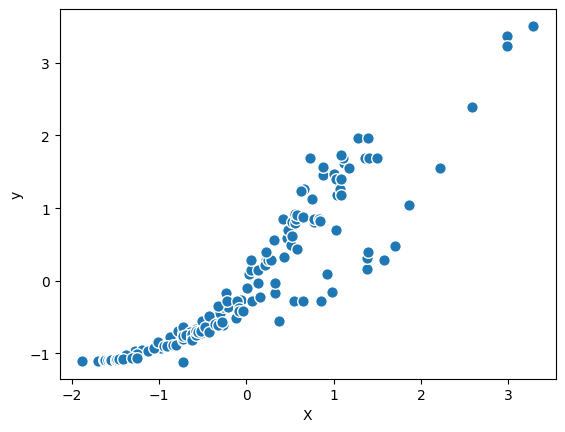

In [ ]:
plt.scatter(x_std[:,0], y_std, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
#Linear Regression
class Linear_Regression:
  def __init__(self, random_state=22520834):
    self.w= None
    self.cost=[]
    self.random_state=random_state

  def fit_normal_equation(self, x, y):
    np.random.seed(self.random_state)
    self.w=np.random.rand(x.shape[1])
    a= x.T @ x
    b=x.T @ y
    self.w= np.linalg.pinv(a) @ b

  def fit_gradient_descent(self, x, y, learning_rate=0.1, iters=200):
    self.iters=iters
    self.learning_rate=learning_rate
    np.random.seed(self.random_state)
    if self.w is None:
      self.w=np.random.uniform(-1, 1, size=(x.shape[1]))
    n_samples=x.shape[0]
    for iter in range(1,self.iters+1):
      prediction=self.predict(x)
      self.w-=(self.learning_rate/n_samples) * x.T @ (prediction-y)
      loss=1/(2*n_samples) * np.sum((prediction-y)**2)
      self.cost.append(loss)
      if iter % 5 == 0:
        print(f"Completion: {iter/self.iters*100:.3f}%, Cost: {self.cost[-1]:.4f}")

  def predict(self, X):
    return X @ self.w

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split the standardized data
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_std, y_std, test_size=0.3, random_state=22520834)

#X bar features
x_train_std=np.insert(x_train_std,0,1,axis=1)
x_test_std=np.insert(x_test_std,0,1,axis=1)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_std = scaler.fit_transform(x_train_std)

In [ ]:
#split the original data
x_train_original,x_test_original,y_train_original,y_test_original=train_test_split(x_original, y_original, test_size=0.3, random_state=22520834)

#X bar features
x_train_original=np.insert(x_train_original,0,1,axis=1)
x_test_original=np.insert(x_test_original,0,1,axis=1)

In [ ]:
#Experiment with gradient descent
model_GD=Linear_Regression()

In [ ]:
model_GD.fit_gradient_descent(x_train_std,y_train_std)

Completion: 2.500%, Cost: 0.0691
Completion: 5.000%, Cost: 0.0673
Completion: 7.500%, Cost: 0.0661
Completion: 10.000%, Cost: 0.0651
Completion: 12.500%, Cost: 0.0644
Completion: 15.000%, Cost: 0.0638
Completion: 17.500%, Cost: 0.0633
Completion: 20.000%, Cost: 0.0629
Completion: 22.500%, Cost: 0.0626
Completion: 25.000%, Cost: 0.0624
Completion: 27.500%, Cost: 0.0621
Completion: 30.000%, Cost: 0.0620
Completion: 32.500%, Cost: 0.0618
Completion: 35.000%, Cost: 0.0617
Completion: 37.500%, Cost: 0.0616
Completion: 40.000%, Cost: 0.0615
Completion: 42.500%, Cost: 0.0614
Completion: 45.000%, Cost: 0.0614
Completion: 47.500%, Cost: 0.0613
Completion: 50.000%, Cost: 0.0612
Completion: 52.500%, Cost: 0.0612
Completion: 55.000%, Cost: 0.0612
Completion: 57.500%, Cost: 0.0611
Completion: 60.000%, Cost: 0.0611
Completion: 62.500%, Cost: 0.0610
Completion: 65.000%, Cost: 0.0610
Completion: 67.500%, Cost: 0.0610
Completion: 70.000%, Cost: 0.0610
Completion: 72.500%, Cost: 0.0609
Completion: 75.00

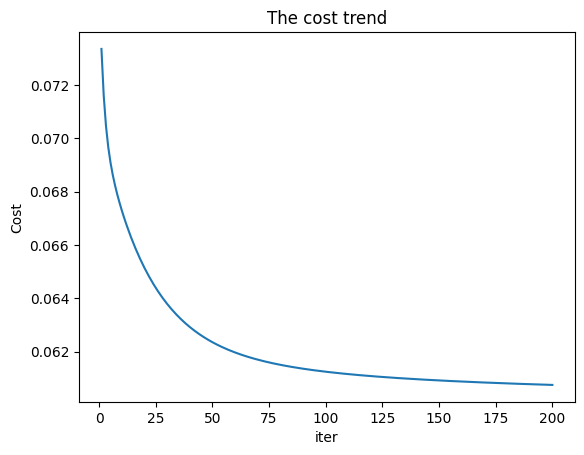

In [ ]:
#The cost trend for gradient descent
plt.plot(range(1, len(model_GD.cost) + 1), model_GD.cost)
plt.xlabel('iter')
plt.ylabel('Cost')
plt.title('The cost trend')
plt.show()

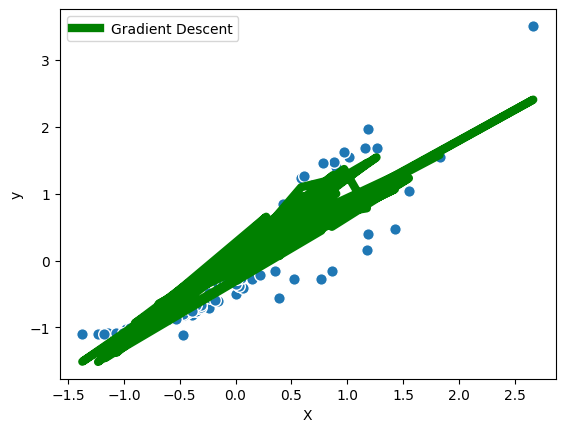

In [ ]:
plt.scatter(x_train_std[:,1], y_train_std, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(x_train_std[:,1], model_GD.predict(x_train_std), color='green', lw=6, label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#r2 score of gradient descent for the standardized test data
prediction_GD_std= model_GD.predict(x_test_std)

r2_GD_std= r2_score(y_test_std, prediction_GD_std)
print("R2 Score of the gradient descent for standardized test data :", r2_GD_std)

R2 Score of the gradient descent for standardized test data : 0.8077339151980467


In [ ]:
#r2 score of gradient descent for the original test data
#Calculate real prediction
prediction_GD = model_GD.predict(x_test_std)* std_original[0] + mean_original[0]

r2_GD_original= r2_score(y_test_original, prediction_GD)
print("R2 Score of the gradient descent for original test data:", r2_GD_original)

R2 Score of the gradient descent for original test data: 0.8077339151980467


In [ ]:
#Experiment with the normal equation on original data
model_NE=Linear_Regression()

model_NE.fit_normal_equation(x_train_original, y_train_original)

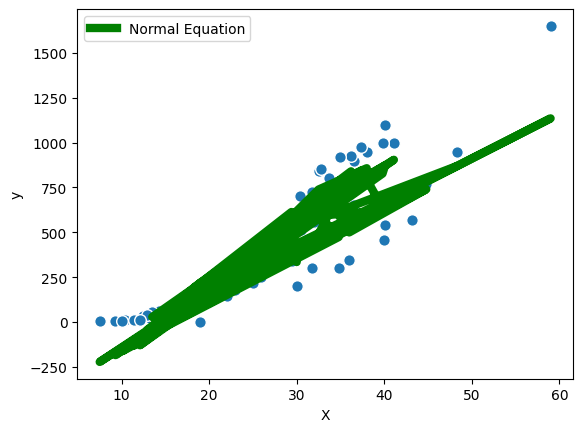

In [ ]:
plt.scatter(x_train_original[:,1], y_train_original, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(x_train_original[:,1], model_NE.predict(x_train_original), color='green', lw=6, label='Normal Equation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#r2 score of the normal equation for original test data
prediction_NE= model_NE.predict(x_test_original)

r2_NE = r2_score(y_test_original, prediction_NE)
print("R2 Score of the normal equation:", r2_NE)

R2 Score of the normal equation: 0.8409254348648196


In [ ]:
#compare the gradient descent's r2 score with the normal equation's r2 score on original test data
print("R2 Score of the normal equation:", r2_NE)

print("R2 Score of the gradient descent:", r2_GD_original)

R2 Score of the normal equation: 0.8409254348648196
R2 Score of the gradient descent: 0.8077339151980467


# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [ ]:
# Code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [ ]:
#load data from csv file
insurance_data=pd.read_csv('insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label Enconding
label_encoder = LabelEncoder()
insurance_data['sex'] = label_encoder.fit_transform(insurance_data['smoker'])
insurance_data['smoker'] = label_encoder.fit_transform(insurance_data['sex'])
insurance_data['region'] = label_encoder.fit_transform(insurance_data['region'])

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
insurance_data=np.array(insurance_data)

In [ ]:
#get charges as labels and remaining attributes as features
x_original=insurance_data[:,:6]
y_original=insurance_data[:,6]

In [ ]:
x_original=np.array(x_original)
y_original=np.array(y_original)

In [ ]:
#Normalize Data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
insurance_data_std = min_max_scaler.fit_transform(insurance_data)

In [ ]:
#get charges as labels and remaining attributes as features on standardized data
x_std=insurance_data_std[:,:6]
y_std=insurance_data_std[:,6]

In [ ]:
y_std=np.array(y_std)
x_std=np.array(x_std)

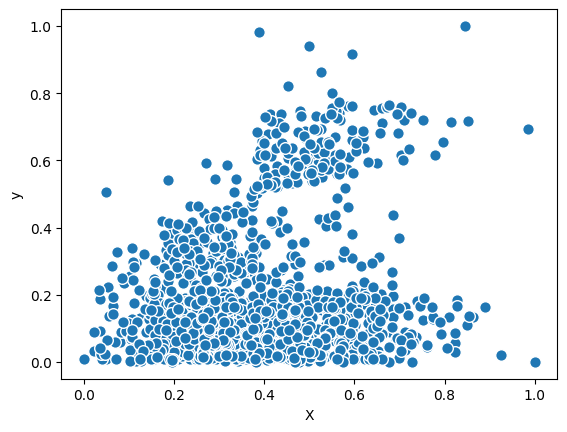

In [ ]:
plt.scatter(x_std[:,2], y_std, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
#Linear Regression
class Linear_Regression:
  def __init__(self, random_state=22520834):
    self.w= None
    self.cost=[]
    self.random_state=random_state

  def fit_normal_equation(self, x, y):
    np.random.seed(self.random_state)
    self.w=np.random.rand(x.shape[1])
    a= x.T @ x
    b=x.T @ y
    self.w= np.linalg.pinv(a) @ b

  def fit_gradient_descent(self, x, y, learning_rate=0.1, iters=200):
    self.iters=iters
    self.learning_rate=learning_rate
    np.random.seed(self.random_state)
    if self.w is None:
      self.w=np.random.uniform(-1, 1, size=(x.shape[1]))
    n_samples=x.shape[0]
    for iter in range(1,self.iters+1):
      prediction=self.predict(x)
      self.w-=(self.learning_rate/n_samples) * x.T @ (prediction-y)
      loss=1/(2*n_samples) * np.sum((prediction-y)**2)
      self.cost.append(loss)
      if iter % 5 == 0:
        print(f"Completion: {iter/self.iters*100:.3f}%, Cost: {self.cost[-1]:.4f}")

  def predict(self, X):
    return X @ self.w

In [ ]:
from sklearn.model_selection import train_test_split
#split the standardized data
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_std, y_std, test_size=0.3, random_state=22520834)
#X bar features
x_train_std=np.insert(x_train_std,0,1,axis=1)
x_test_std=np.insert(x_test_std,0,1,axis=1)

In [ ]:
#split the original data
x_train_original,x_test_original,y_train_original,y_test_original=train_test_split(x_original, y_original, test_size=0.3, random_state=22520834)

#X bar features
x_train_original=np.insert(x_train_original,0,1,axis=1)
x_test_original=np.insert(x_test_original,0,1,axis=1)

In [ ]:
#Experiment with gradient descent
model_GD=Linear_Regression()

In [ ]:
model_GD.fit_gradient_descent(x_train_std,y_train_std)

Completion: 2.500%, Cost: 0.1438
Completion: 5.000%, Cost: 0.0827
Completion: 7.500%, Cost: 0.0626
Completion: 10.000%, Cost: 0.0507
Completion: 12.500%, Cost: 0.0421
Completion: 15.000%, Cost: 0.0355
Completion: 17.500%, Cost: 0.0303
Completion: 20.000%, Cost: 0.0262
Completion: 22.500%, Cost: 0.0229
Completion: 25.000%, Cost: 0.0202
Completion: 27.500%, Cost: 0.0180
Completion: 30.000%, Cost: 0.0162
Completion: 32.500%, Cost: 0.0148
Completion: 35.000%, Cost: 0.0135
Completion: 37.500%, Cost: 0.0124
Completion: 40.000%, Cost: 0.0115
Completion: 42.500%, Cost: 0.0108
Completion: 45.000%, Cost: 0.0101
Completion: 47.500%, Cost: 0.0095
Completion: 50.000%, Cost: 0.0090
Completion: 52.500%, Cost: 0.0086
Completion: 55.000%, Cost: 0.0082
Completion: 57.500%, Cost: 0.0078
Completion: 60.000%, Cost: 0.0075
Completion: 62.500%, Cost: 0.0073
Completion: 65.000%, Cost: 0.0070
Completion: 67.500%, Cost: 0.0068
Completion: 70.000%, Cost: 0.0066
Completion: 72.500%, Cost: 0.0065
Completion: 75.00

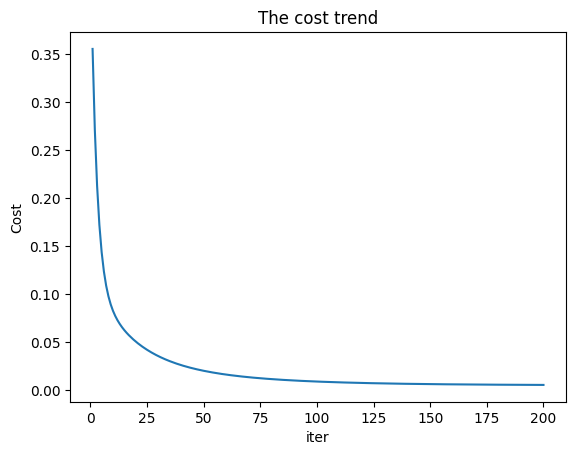

In [ ]:
#The cost trend for gradient descent
plt.plot(range(1, len(model_GD.cost) + 1), model_GD.cost)
plt.xlabel('iter')
plt.ylabel('Cost')
plt.title('The cost trend')
plt.show()

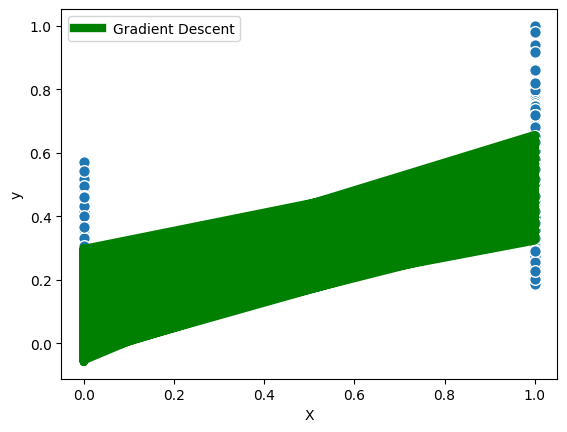

In [ ]:
plt.scatter(x_train_std[:,2], y_train_std, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(x_train_std[:,2], model_GD.predict(x_train_std), color='green', lw=6, label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#r2 score of gradient descent for the standardized test data
prediction_GD_std= model_GD.predict(x_test_std)

r2_GD_std= r2_score(y_test_std, prediction_GD_std)
print("R2 Score of the gradient descent for standardized test data :", r2_GD_std)

R2 Score of the gradient descent for standardized test data : 0.7450996486565419


In [ ]:
#r2 score of gradient descent for the original test data
#Calculate real prediction
prediction_GD = model_GD.predict(x_test_std)*(y_original.max()-y_original.min())+y_original.min()

r2_GD_original= r2_score(y_test_original, prediction_GD)
print("R2 Score of the gradient descent for original test data:", r2_GD_original)

R2 Score of the gradient descent for original test data: 0.7450996486565418


In [ ]:
#Experiment with the normal equation on original data
model_NE=Linear_Regression()

model_NE.fit_normal_equation(x_train_original, y_train_original)

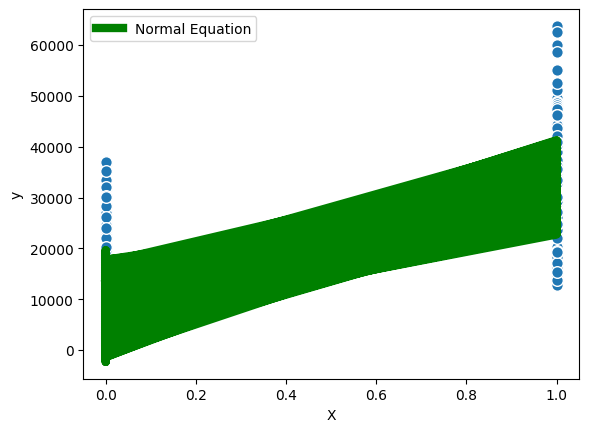

In [ ]:
plt.scatter(x_train_original[:,2], y_train_original, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(x_train_original[:,2], model_NE.predict(x_train_original), color='green', lw=6, label='Normal Equation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#r2 score of the normal equation for original test data
prediction_NE= model_NE.predict(x_test_original)

r2_NE = r2_score(y_test_original, prediction_NE)
print("R2 Score of the normal equation:", r2_NE)

R2 Score of the normal equation: 0.7751976807419594


In [ ]:
#compare the gradient descent's r2 score with the normal equation's r2 score on original test data
print("R2 Score of the normal equation:", r2_NE)

print("R2 Score of the gradient descent:", r2_GD_original)

R2 Score of the normal equation: 0.7751976807419594
R2 Score of the gradient descent: 0.7450996486565418


# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [ ]:
# Code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [ ]:
#load data from csv file
ts_data=pd.read_csv('tesla_stock.csv')
ts_data

,Open,High,Low,Close,Volume
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500
2412,575.690002,589.799988,567.429993,580.989990,17801500
2413,632.419983,650.880005,618.000000,640.809998,29005700
2414,640.000000,653.000000,632.520020,650.570007,15719300


In [ ]:
ts_data=np.array(ts_data)

In [ ]:
#get charges as labels and remaining attributes as features
selected_columns=[0,1,2,4]

x_original=ts_data[:,selected_columns]
y_original=ts_data[:,3]

In [ ]:
x_original=np.array(x_original)
y_original=np.array(y_original)

In [ ]:
#Normalize Data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
ts_data_std = min_max_scaler.fit_transform(ts_data)

In [ ]:
#get winsurance_data_stdeight as labels and remaining attributes as features on standardized data
x_std=ts_data_std[:,selected_columns]
y_std=ts_data_std[:,3]

In [ ]:
y_std=np.array(y_std)
x_std=np.array(x_std)

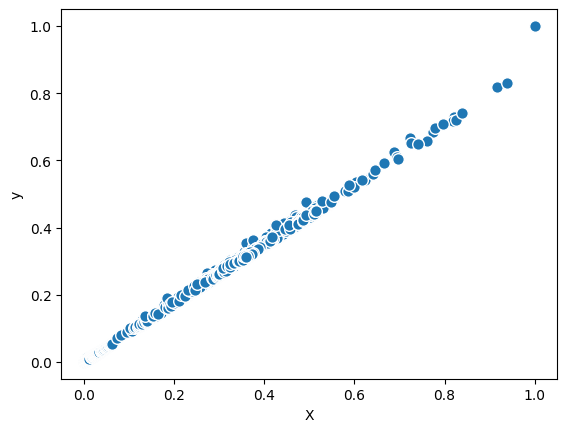

In [ ]:
plt.scatter(x_std[:,2], y_std, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
#Linear Regression
class Linear_Regression:
  def __init__(self, random_state=22520834):
    self.w= None
    self.cost=[]
    self.random_state=random_state

  def fit_normal_equation(self, x, y):
    np.random.seed(self.random_state)
    self.w=np.random.rand(x.shape[1])
    a= x.T @ x
    b=x.T @ y
    self.w= np.linalg.pinv(a) @ b

  def fit_gradient_descent(self, x, y, learning_rate=0.1, iters=200):
    self.iters=iters
    self.learning_rate=learning_rate
    np.random.seed(self.random_state)
    if self.w is None:
      self.w=np.random.uniform(-1, 1, size=(x.shape[1]))
    n_samples=x.shape[0]
    for iter in range(1,self.iters+1):
      prediction=self.predict(x)
      self.w-=(self.learning_rate/n_samples) * x.T @ (prediction-y)
      loss=1/(2*n_samples) * np.sum((prediction-y)**2)
      self.cost.append(loss)
      if iter % 5 == 0:
        print(f"Completion: {iter/self.iters*100:.3f}%, Cost: {self.cost[-1]:.4f}")

  def predict(self, X):
    return X @ self.w

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split the standardized data
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_std, y_std, test_size=0.3, random_state=22520834)

#X bar features
x_train_std=np.insert(x_train_std,0,1,axis=1)
x_test_std=np.insert(x_test_std,0,1,axis=1)

In [ ]:
#split the original data
x_train_original,x_test_original,y_train_original,y_test_original=train_test_split(x_original, y_original, test_size=0.3, random_state=22520834)

#X bar features
x_train_original=np.insert(x_train_original,0,1,axis=1)
x_test_original=np.insert(x_test_original,0,1,axis=1)

In [ ]:
#Experiment with gradient descent
model_GD=Linear_Regression()

In [ ]:
model_GD.fit_gradient_descent(x_train_std,y_train_std)

Completion: 2.500%, Cost: 0.0157
Completion: 5.000%, Cost: 0.0051
Completion: 7.500%, Cost: 0.0021
Completion: 10.000%, Cost: 0.0013
Completion: 12.500%, Cost: 0.0010
Completion: 15.000%, Cost: 0.0008
Completion: 17.500%, Cost: 0.0008
Completion: 20.000%, Cost: 0.0007
Completion: 22.500%, Cost: 0.0007
Completion: 25.000%, Cost: 0.0006
Completion: 27.500%, Cost: 0.0006
Completion: 30.000%, Cost: 0.0005
Completion: 32.500%, Cost: 0.0005
Completion: 35.000%, Cost: 0.0005
Completion: 37.500%, Cost: 0.0004
Completion: 40.000%, Cost: 0.0004
Completion: 42.500%, Cost: 0.0004
Completion: 45.000%, Cost: 0.0003
Completion: 47.500%, Cost: 0.0003
Completion: 50.000%, Cost: 0.0003
Completion: 52.500%, Cost: 0.0003
Completion: 55.000%, Cost: 0.0003
Completion: 57.500%, Cost: 0.0002
Completion: 60.000%, Cost: 0.0002
Completion: 62.500%, Cost: 0.0002
Completion: 65.000%, Cost: 0.0002
Completion: 67.500%, Cost: 0.0002
Completion: 70.000%, Cost: 0.0002
Completion: 72.500%, Cost: 0.0002
Completion: 75.00

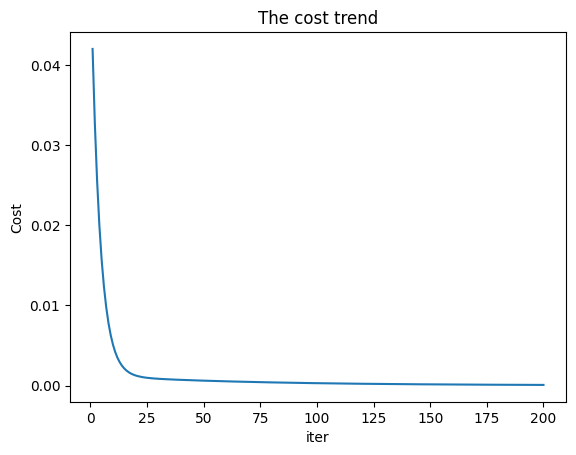

In [ ]:
#The cost trend for gradient descent
plt.plot(range(1, len(model_GD.cost) + 1), model_GD.cost)
plt.xlabel('iter')
plt.ylabel('Cost')
plt.title('The cost trend')
plt.show()

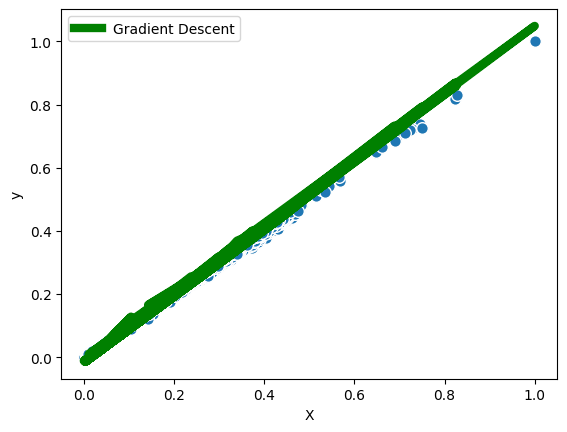

In [ ]:
plt.scatter(x_train_std[:,2], y_train_std, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(x_train_std[:,2], model_GD.predict(x_train_std), color='green', lw=6, label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#r2 score of gradient descent for the standardized test data
prediction_GD_std= model_GD.predict(x_test_std)

r2_GD_std= r2_score(y_test_std, prediction_GD_std)
print("R2 Score of the gradient descent for standardized test data :", r2_GD_std)

R2 Score of the gradient descent for standardized test data : 0.9923357580890738


In [ ]:
#r2 score of gradient descent for the original test data
#Calculate real prediction
prediction_GD = model_GD.predict(x_test_std)*(y_original.max()-y_original.min())+y_original.min()

r2_GD_original= r2_score(y_test_original, prediction_GD)
print("R2 Score of the gradient descent for original test data:", r2_GD_original)

R2 Score of the gradient descent for original test data: 0.9923357580890737


In [ ]:
#Experiment with the normal equation on original data
model_NE=Linear_Regression()

model_NE.fit_normal_equation(x_train_original, y_train_original)

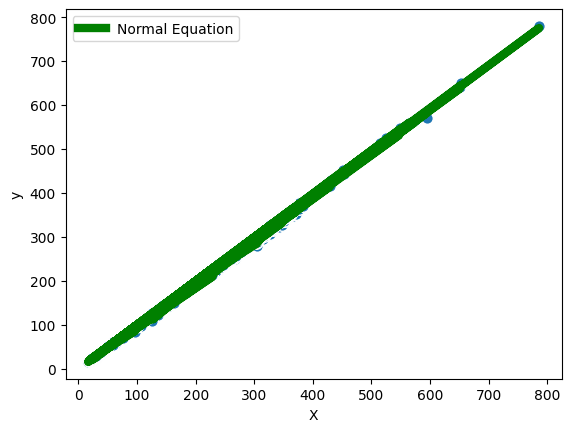

In [ ]:
plt.scatter(x_train_original[:,2], y_train_original, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(x_train_original[:,2], model_NE.predict(x_train_original), color='green', lw=6, label='Normal Equation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#r2 score of the normal equation for original test data
prediction_NE= model_NE.predict(x_test_original)

r2_NE = r2_score(y_test_original, prediction_NE)
print("R2 Score of the normal equation:", r2_NE)

R2 Score of the normal equation: 0.999680880020839


In [ ]:
#compare the gradient descent's r2 score with the normal equation's r2 score on original test data
print("R2 Score of the normal equation:", r2_NE)

print("R2 Score of the gradient descent:", r2_GD_original)

R2 Score of the normal equation: 0.999680880020839
R2 Score of the gradient descent: 0.9923357580890737
